In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
file_path = "../datasets/national_health_data_2024.csv"
df = pd.read_csv(file_path)
df

,cnty_fips,display_name,poverty_perc,median_household_income,education_less_than_high_school_percent,air_quality,park_access,percent_inactive,percent_smoking,urban_rural_status,elderly_percentage,number_of_hospitals,number_of_primary_care_physicians,percent_no_heath_insurance,percent_high_blood_pressure,percent_coronary_heart_disease,percent_stroke,percent_high_cholesterol
0,2013,"""Aleutians East, (AK)""",15.1,79000,13.4,-1.0,66,21.5,18.5,Rural,8.8,0,-1.0,23.3,34.1,5.9,3.1,31.2
1,2016,"""Aleutians West, (AK)""",8.1,92000,8.2,-1.0,86,20.0,16.7,Rural,5.8,0,2.8,17.7,30.3,4.6,2.3,30.3
2,2020,"""Anchorage, (AK)""",8.3,85000,6.0,6.4,83,17.9,15.7,Small City,10.0,4,0.8,11.1,28.8,4.9,2.5,29.4
3,2050,"""Bethel, (AK)""",25.3,52000,16.5,-1.0,76,22.0,34.0,Rural,7.1,1,0.9,16.8,36.2,8.1,5.1,28.7
4,2060,"""Bristol Bay, (AK)""",10.7,87000,6.2,-1.0,30,20.9,17.8,Rural,9.6,0,-1.0,15.1,33.6,7.5,3.7,32.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,55113,"""Sawyer, (WI)""",12.3,50000,7.9,5.6,39,24.4,19.1,Rural,24.8,1,1.3,10.9,39.2,9.5,4.4,39.5
3138,55115,"""Shawano, (WI)""",10.3,58000,8.0,7.1,26,22.0,20.2,Rural,20.3,1,1.8,9.0,36.2,8.1,3.8,36.0
3139,55119,"""Taylor, (WI)""",9.6,55000,11.8,5.3,20,21.9,18.8,Rural,18.2,1,3.4,8.6,35.0,8.1,3.7,37.3
3140,55125,"""Vilas, (WI)""",9.7,55000,5.4,5.4,53,19.8,16.6,Rural,30.2,2,1.7,10.9,41.1,9.3,4.1,40.6


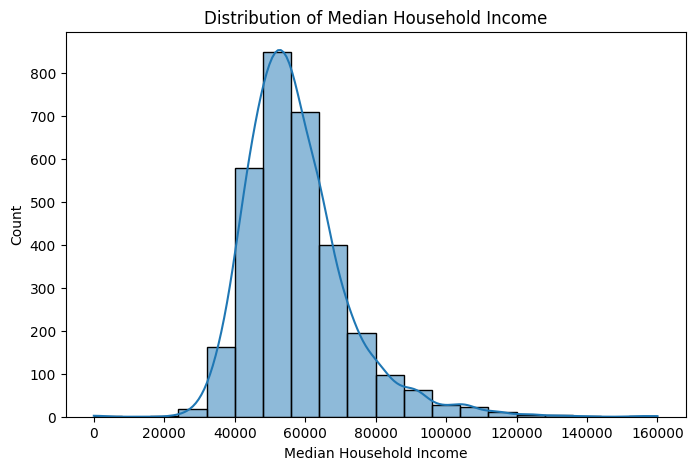

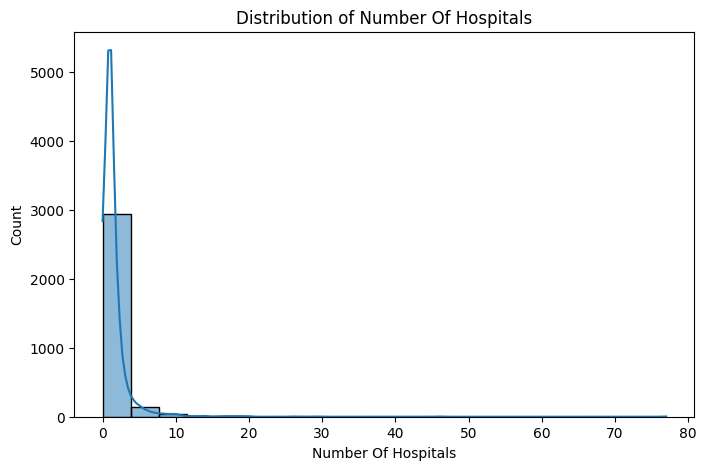

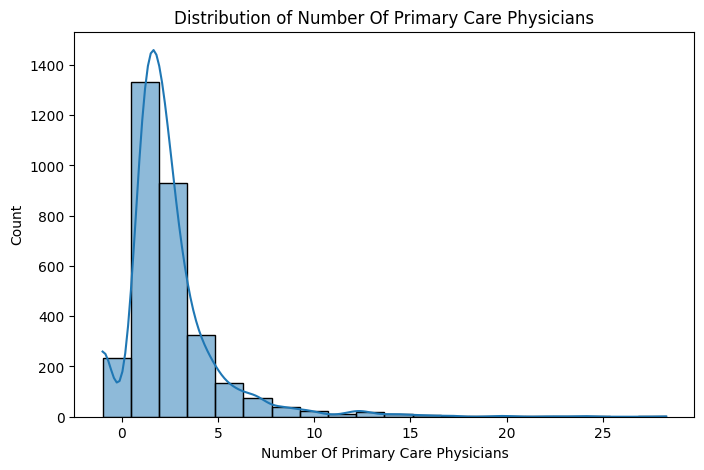

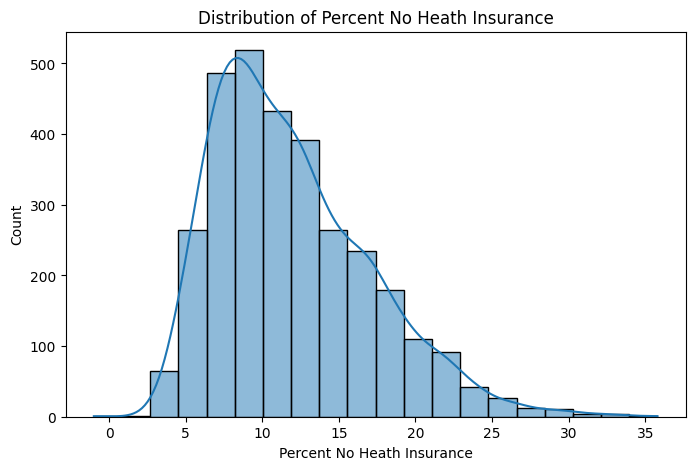

In [ ]:
# Select the relevant columns
columns_of_interest = [
    "median_household_income", 
    "number_of_hospitals", 
    "number_of_primary_care_physicians", 
    "percent_no_heath_insurance"
]

# Convert to numeric, handling errors
df[columns_of_interest] = df[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Summary statistics
eda_summary = df[columns_of_interest].describe().T
eda_summary["mode"] = df[columns_of_interest].mode().iloc[0]
eda_summary = eda_summary[["min", "max", "mean", "std", "50%", "mode"]]
eda_summary.rename(columns={"50%": "median"}, inplace=True)

# Plot bar charts for distributions
for column in columns_of_interest:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=20, kde=True)
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel("Count")
    plt.title(f"Distribution of {column.replace('_', ' ').title()}")
    plt.show()


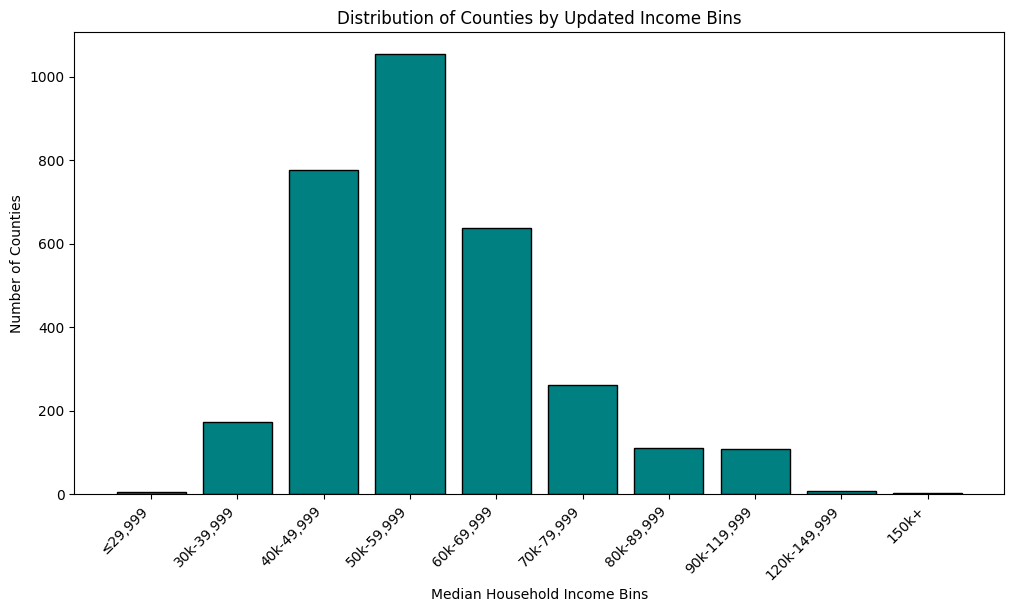

In [12]:
# Define new custom bins for median household income
income_bins = [0, 29999, 39999, 49999, 59999, 69999, 79999, 89999, 119999, 149999, float("inf")]
income_labels = [
    "≤29,999", "30k-39,999", "40k-49,999", "50k-59,999", "60k-69,999", 
    "70k-79,999", "80k-89,999", "90k-119,999", "120k-149,999", "150k+"
]

# Categorize counties into bins using the original dataset
df["income_bins"] = pd.cut(df["median_household_income"], bins=income_bins, labels=income_labels)

# Count the number of counties in each bin
income_bin_counts = df["income_bins"].value_counts().sort_index()

# Plot the distribution of counties across new income bins
plt.figure(figsize=(12, 6))
plt.bar(income_bin_counts.index.astype(str), income_bin_counts, color="teal", edgecolor="black")
plt.xlabel("Median Household Income Bins")
plt.ylabel("Number of Counties")
plt.title("Distribution of Counties by Updated Income Bins")
plt.xticks(rotation=45, ha="right")
plt.show()
